In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import numpy

chemin_excel ='/Users/eva-andreetiomo/Documents/ENSAE/projet python/Niveau_de_vie_2013_a_la_commune-Global_Map_Solution.xlsx'
df = pd.read_excel(chemin_excel)
print(df.head())
df.columns

  CodePostal              Nom Commune  Niveau de vie Commune  \
0       1001  L'Abergement-Clémenciat           22130.000000   
1       1002    L'Abergement-de-Varey           23213.000000   
2       1004        Ambérieu-en-Bugey           19554.000000   
3       1005      Ambérieux-en-Dombes           22387.619048   
4       1006                  Ambléon           21871.666667   

   NiveaudevieDépartement  
0            22343.574665  
1            22343.574665  
2            22343.574665  
3            22343.574665  
4            22343.574665  


Index(['CodePostal', 'Nom Commune', 'Niveau de vie Commune',
       'NiveaudevieDépartement'],
      dtype='object')

In [29]:
import pandas as pd

# Chargement de la base de données
chemin_excel ='/Users/eva-andreetiomo/Documents/ENSAE/projet python/Niveau_de_vie_2013_a_la_commune-Global_Map_Solution.xlsx'
df = pd.read_excel(chemin_excel)

# Conversion la colonne 'CodePostal' en type chaîne de caractères
df['CodePostal'] = df['CodePostal'].astype(str)

# Ajout d'un zéro aux codes postaux de moins de 5 caractères
df['CodePostal'] = df['CodePostal'].apply(lambda x: x.zfill(5))

# Ajout d'une colonne 'Departement' en extrayant les deux premiers caractères du code postal
df['Departement'] = df['CodePostal'].str[:2]

# Conversion de la colonne 'Revenu' en type numérique
df['NiveaudevieDépartement'] = pd.to_numeric(df['NiveaudevieDépartement'], errors='coerce')

# Sélection de la colonne 'Revenu' correspondant au département
resultat_final = df[['Departement', 'NiveaudevieDépartement']].copy()

# Supprimer les doublons, ne conservant qu'une ligne par département
resultat_final = resultat_final.drop_duplicates()

# Réinitialiser l'index
resultat_final.reset_index(drop=True, inplace=True)

# Afficher le DataFrame résultat
print(resultat_final)

   Departement  NiveaudevieDépartement
0           01            22343.574665
1           02            18111.487190
2           03            18828.862338
3           04            19008.420673
4           05            19202.516480
..         ...                     ...
91          93            17192.209405
92          94            22313.927141
93          95            21296.219805
94          2A            19525.216810
95          2B            18016.138123

[96 rows x 2 columns]


In [30]:
!pip install --upgrade xlrd #colab bug verson xlrd
!pip install geopandas

In [31]:
!pip install plotnine

In [34]:
import geopandas as gpd

# Charger le fichier shapefile des départements français

shapefile_path = '/Users/eva-andreetiomo/Documents/ENSAE/projet python/departements-20170102-shp/departements-20170102.shp'
map_df = gpd.read_file(shapefile_path)

# Afficher les premières lignes du GeoDataFrame
print(map_df.head())

  code_insee          nom  nuts3                 wikipedia wikidata   surf_ha  \
0         43  Haute-Loire  FR723            fr:Haute-Loire   Q12572  500360.0   
1         63  Puy-de-Dôme  FR724            fr:Puy-de-Dôme   Q12694  801543.0   
2         12      Aveyron  FR622  fr:Aveyron (département)    Q3216  877339.0   
3         48       Lozère  FR814   fr:Lozère (département)   Q12580  517505.0   
4         81         Tarn  FR627     fr:Tarn (département)   Q12772  578240.0   

                                            geometry  
0  POLYGON ((3.08206 45.28988, 3.08209 45.29031, ...  
1  POLYGON ((2.38802 45.82583, 2.38802 45.82587, ...  
2  POLYGON ((1.83966 44.47586, 1.83969 44.47613, ...  
3  POLYGON ((2.98226 44.64515, 2.98304 44.64546, ...  
4  POLYGON ((1.53530 43.95960, 1.53551 43.95967, ...  


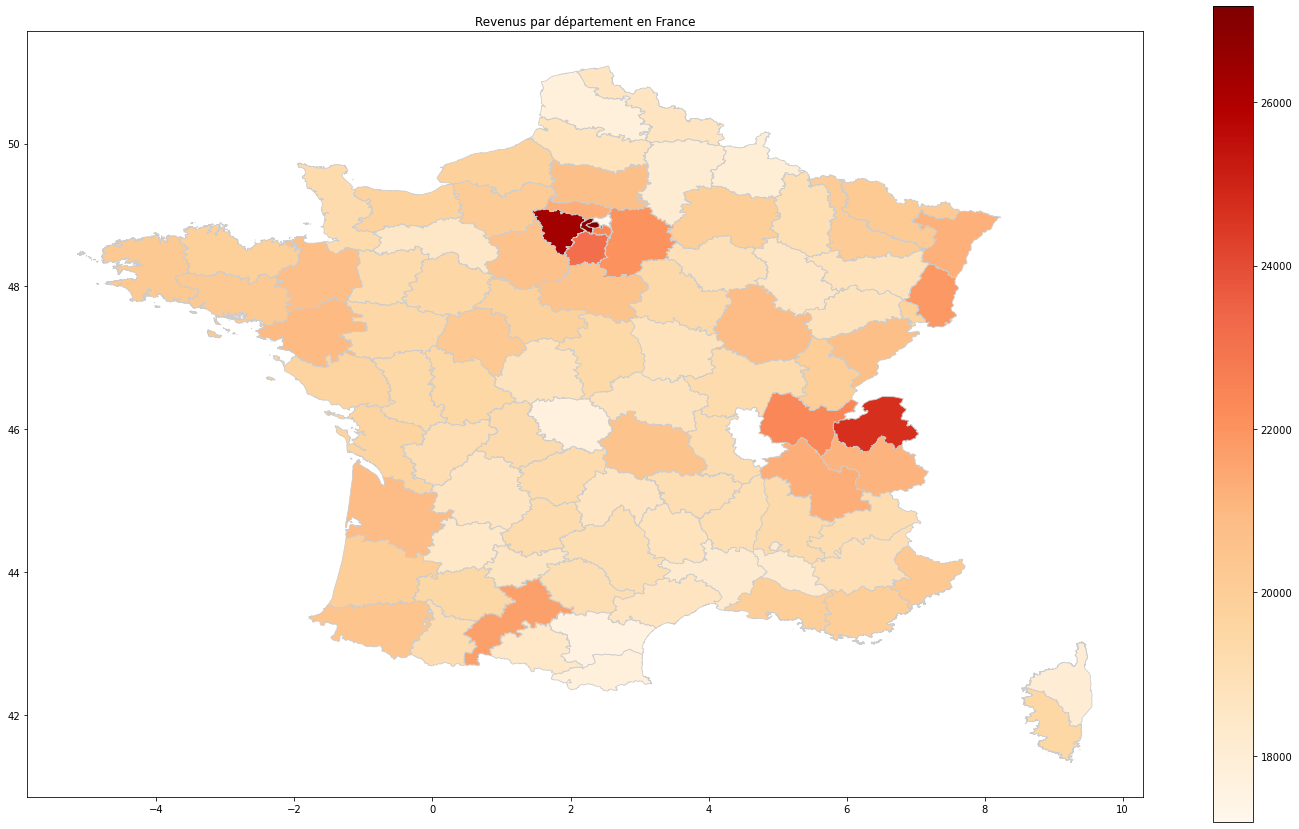

In [35]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Chargement du fichier shapefile des départements français
shapefile_path = '/Users/eva-andreetiomo/Documents/ENSAE/projet python/departements-20170102-shp/departements-20170102.shp'
map_df= gpd.read_file(shapefile_path)

# Je reprends le DataFrame avec les revenus par département que je viens de créer

# Fusionner le DataFrame des revenus avec le GeoDataFrame des départements
merged = map_df.set_index('code_insee').join(resultat_final.set_index('Departement'))

# Créer une figure et des axes pour la carte
fig, ax = plt.subplots(1, 1, figsize=(25, 15))

# Plotter la carte en utilisant les revenus pour la coloration
merged.plot(column='NiveaudevieDépartement', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Ajouter un titre
plt.title('Revenus par département en France')

# Afficher la carte
plt.show()

In [36]:
import pandas as pd

# Chargement de la base de données
chemin_excel ='/Users/eva-andreetiomo/Documents/ENSAE/projet python/Niveau_de_vie_2013_a_la_commune-Global_Map_Solution.xlsx'
df = pd.read_excel(chemin_excel)

# Conversion la colonne 'CodePostal' en type chaîne de caractères
df['CodePostal'] = df['CodePostal'].astype(str)

# Ajout d'un zéro aux codes postaux de moins de 5 caractères
df['CodePostal'] = df['CodePostal'].apply(lambda x: x.zfill(5))

# Ajout d'une colonne 'Departement' en extrayant les deux premiers caractères du code postal
df['Departement'] = df['CodePostal'].str[:2]

# Sélection de la colonne 'commune' correspondant au département
resultat_villedep = df[['Departement', 'Nom Commune']].copy()

# Réinitialiser l'index
resultat_villedep.reset_index(drop=True, inplace=True)

# Afficher le DataFrame résultat
print(resultat_villedep)

      Departement              Nom Commune
0              01  L'Abergement-Clémenciat
1              01    L'Abergement-de-Varey
2              01        Ambérieu-en-Bugey
3              01      Ambérieux-en-Dombes
4              01                  Ambléon
...           ...                      ...
36567          2B                   Zalana
36568          2B                    Zilia
36569          2B                    Zuani
36570          2B   San-Gavino-di-Fiumorbo
36571          2B                    Chisa

[36572 rows x 2 columns]


     |████████████████████████████████| 1.3 MB 52 kB/s eta 0:00:011
     |████████████████████████████████| 7.6 MB 718 kB/s eta 0:00:01
     |████████████████████████████████| 73 kB 657 kB/s eta 0:00:01
     |████████████████████████████████| 10.6 MB 604 kB/s eta 0:00:01
     |████████████████████████████████| 257 kB 753 kB/s eta 0:00:01
     |████████████████████████████████| 37.3 MB 980 kB/s eta 0:00:01
     |████████████████████████████████| 234 kB 957 kB/s eta 0:00:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.1
    Uninstalling scipy-1.7.1:
      Successfully uninstalled scipy-1.7.1
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.2
    Uninstalling patsy-0.5.2:
      Successfully uninstalled patsy-0.5.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3
  Attempting uninstall: statsmodels
    Found existing inst